<a href="https://colab.research.google.com/github/Thasni-pu/projects/blob/main/SMS_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,r2_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
df=pd.read_csv("/content/spam.csv",encoding='latin-1',engine="python",usecols=['v1','v2'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.size

11144

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.columns = ["label","message"]

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isna().sum()

,0
label,0
message,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


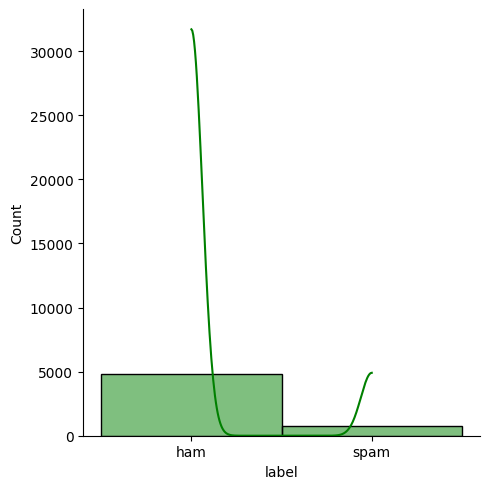

In [ ]:
import seaborn as sns
sns.displot(df.label,kde=True,color="green")

<Axes: xlabel='label', ylabel='Count'>

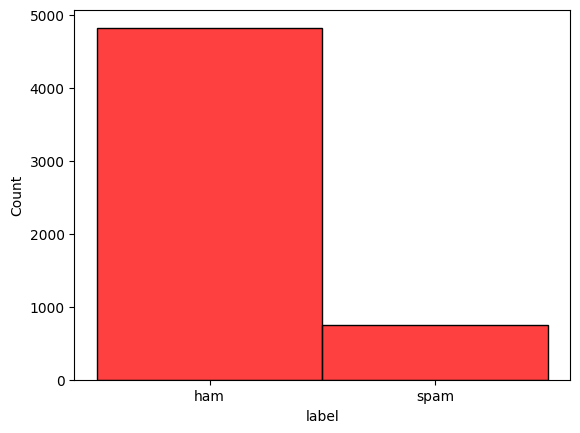

In [ ]:
sns.histplot(df.label,color="red")

In [ ]:
df.dtypes

,0
label,object
message,object


In [ ]:
df["label"].value_counts()

,count
label,
ham,4825
spam,747


<Axes: xlabel='label', ylabel='count'>

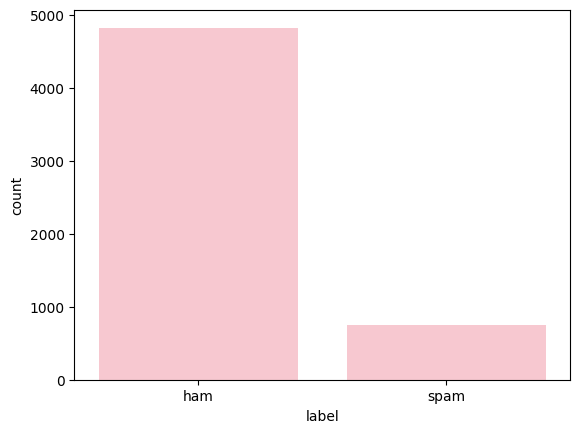

In [ ]:
sns.countplot(x="label",data=df,color="pink")

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["label"]=encoder.fit_transform(df["label"].values)

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

In [ ]:
x=vectorizer.fit_transform(df["message"])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df["label"]

In [ ]:
df.count()

,0
label,5572
message,5572


In [ ]:
p,k=len(df[df["label"]==0]),len(df[df["label"]==1])

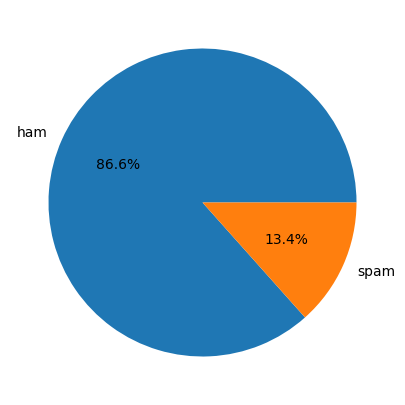

In [ ]:
label=np.array(["ham","spam"])
values=np.array([p,k])
plt.figure(figsize=(5,5))
plt.pie(values,labels=label,autopct="%.1f%%")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
m=['logistic regression', 'Naive Bayes Model','svm model']
lr=LogisticRegression()
nb=MultinomialNB()
sv=SVC()
lst=[lr,nb,sv]
for i in lst:
  print('model is',i)
  print('Model creation:')
  i.fit(x_train,y_train)
  print('predicted value:')
  y_pred=i.predict(x_test)
  print('confusion matrix is:')
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

model is LogisticRegression()
Model creation:
predicted value:
confusion matrix is:
[[965   0]
 [ 41 109]]
0.9632286995515695
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

model is MultinomialNB()
Model creation:
predicted value:
confusion matrix is:
[[965   0]
 [ 42 108]]
0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

model is SVC()
Model creation:
predicted value:
confusion matrix is:
[[965   0]
 [ 26 124]]
0.97668